In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
import knunu_utils
import ksnunu_utils

from Bayesian_pyhf import plotting
import arviz as az
import corner

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]

model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)
yields = data[:model.config.nmaindata]

## Load and plot samples

In [3]:
post_data = az.from_json( 'samples/comb_post_data.json')
post_pred = az.from_json( 'samples/comb_post_pred.json')
prior_pred = az.from_json('samples/comb_prior_pred.json')

In [4]:
post_data.posterior

<xarray.Dataset>
Dimensions:                     (chain: 4, draw: 100,
                                 FFK_decorrelated[0]_dim_0: 1,
                                 FFK_decorrelated[1]_dim_0: 1,
                                 FFK_decorrelated[2]_dim_0: 1,
                                 FFK_decorrelated[3]_dim_0: 1,
                                 FFK_decorrelated[4]_dim_0: 1,
                                 ...
                                 FFKs_decorrelated[4]_dim_0: 1,
                                 FFKs_decorrelated[5]_dim_0: 1,
                                 FFKs_decorrelated[6]_dim_0: 1,
                                 FFKs_decorrelated[7]_dim_0: 1, cvl_dim_0: 1,
                                 cvr_dim_0: 1, csl_dim_0: 1, csr_dim_0: 1,
                                 ctl_dim_0: 1)
Coordinates: (12/25)
  * chain                       (chain) int64 0 1 2 3
  * draw                        (draw) int64 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
  * FFK_decorrelated[0]_dim_0   (FFK_decorrelated[0]_dim_0) int64 0
  * FFK_decorrelated[1]_dim_0   (FFK_decorrelated[1]_dim_0) int64 0
  * FFK_decorrelated[2]_dim_0   (FFK_decorrelated[2]_dim_0) int64 0
  * FFK_decorrelated[3]_dim_0   (FFK_decorrelated[3]_dim_0) int64 0
    ...                          ...
  * FFKs_decorrelated[7]_dim_0  (FFKs_decorrelated[7]_dim_0) int64 0
  * cvl_dim_0                   (cvl_dim_0) int64 0
  * cvr_dim_0                   (cvr_dim_0) int64 0
  * csl_dim_0                   (csl_dim_0) int64 0
  * csr_dim_0                   (csr_dim_0) int64 0
  * ctl_dim_0                   (ctl_dim_0) int64 0
Data variables: (12/23)
    FFK_decorrelated[0]         (chain, draw, FFK_decorrelated[0]_dim_0) float64 ...
    FFK_decorrelated[1]         (chain, draw, FFK_decorrelated[1]_dim_0) float64 ...
    FFK_decorrelated[2]         (chain, draw, FFK_decorrelated[2]_dim_0) float64 ...
    FFK_decorrelated[3]         (chain, draw, FFK_decorrelated[3]_dim_0) float64 ...
    FFK_decorrelated[4]         (chain, draw, FFK_decorrelated[4]_dim_0) float64 ...
    FFK_decorrelated[5]         (chain, draw, FFK_decorrelated[5]_dim_0) float64 ...
    ...                          ...
    FFKs_decorrelated[7]        (chain, draw, FFKs_decorrelated[7]_dim_0) float64 ...
    cvl                         (chain, draw, cvl_dim_0) float64 3.639 ... 4.545
    cvr                         (chain, draw, cvr_dim_0) float64 1.998 ... 0....
    csl                         (chain, draw, csl_dim_0) float64 0.09927 ... ...
    csr                         (chain, draw, csr_dim_0) float64 0.5102 ... 0...
    ctl                         (chain, draw, ctl_dim_0) float64 0.7652 ... 0...
Attributes:
    created_at:                 2023-12-01T17:13:00.774235
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.0
    sampling_time:              11.781065702438354
    tuning_steps:               15

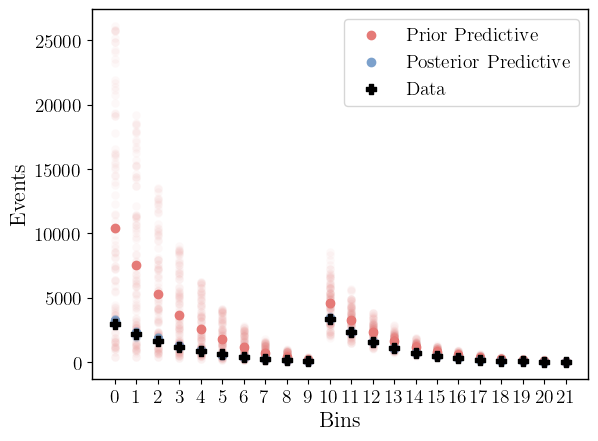

In [5]:
plotting.prior_posterior_predictives(model=model, data=yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

/opt/venv/lib/python3.10/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (23), generating only 20 plots
  warnings.warn(


array([[<Axes: title={'center': 'FFKs_decorrelated[6]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[6]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[7]'}>,
        <Axes: title={'center': 'FFK_decorrelated[7]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[2]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[2]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[1]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[1]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[1]'}>,
        <Axes: title={'center': 'FFK_decorrelated[1]'}>],
       [<Axes: title={'center': 'csr'}>, <Axes: title={'center': 'csr'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'FFK_decorrelated[6]'}>,
        <Axes: title={'center': 'FFK_decorrelated[6]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[7]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[7]'}>],
       [<Axes: title={'cent

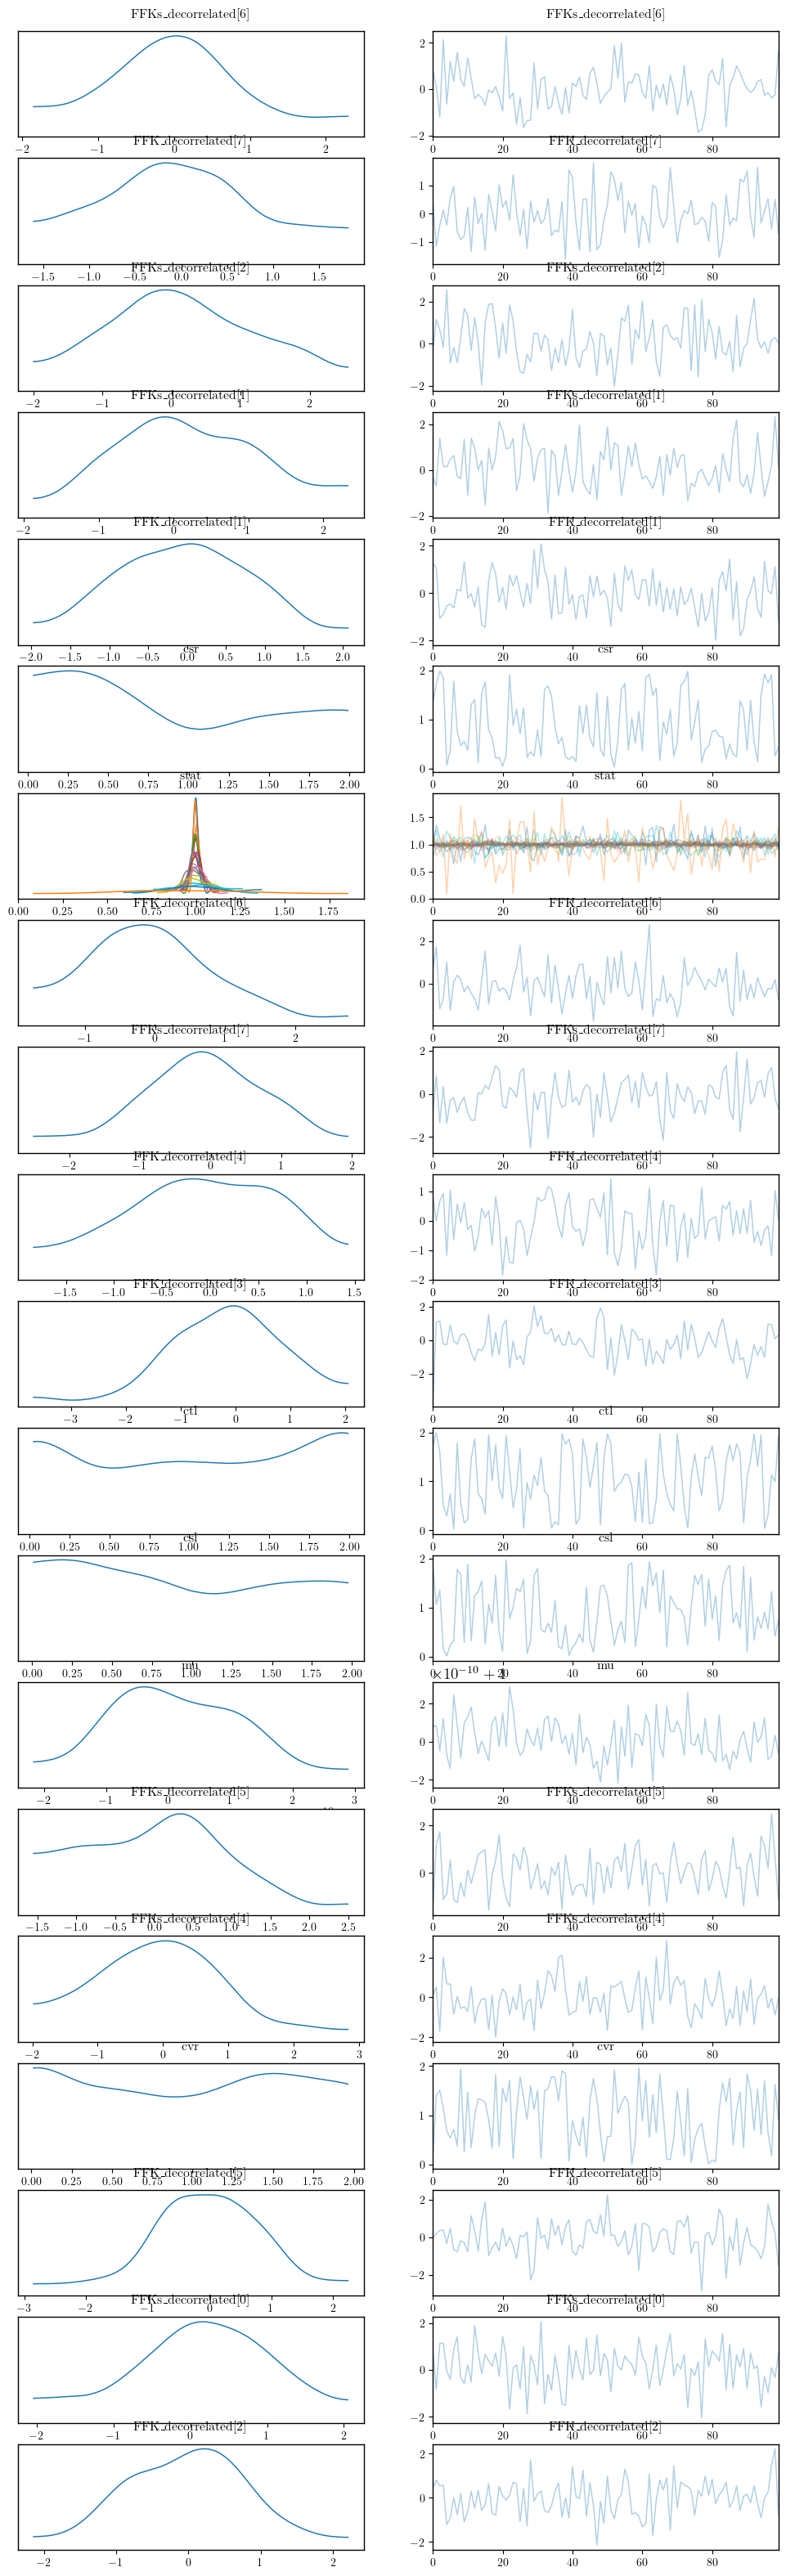

In [6]:
az.plot_trace(prior_pred.prior)

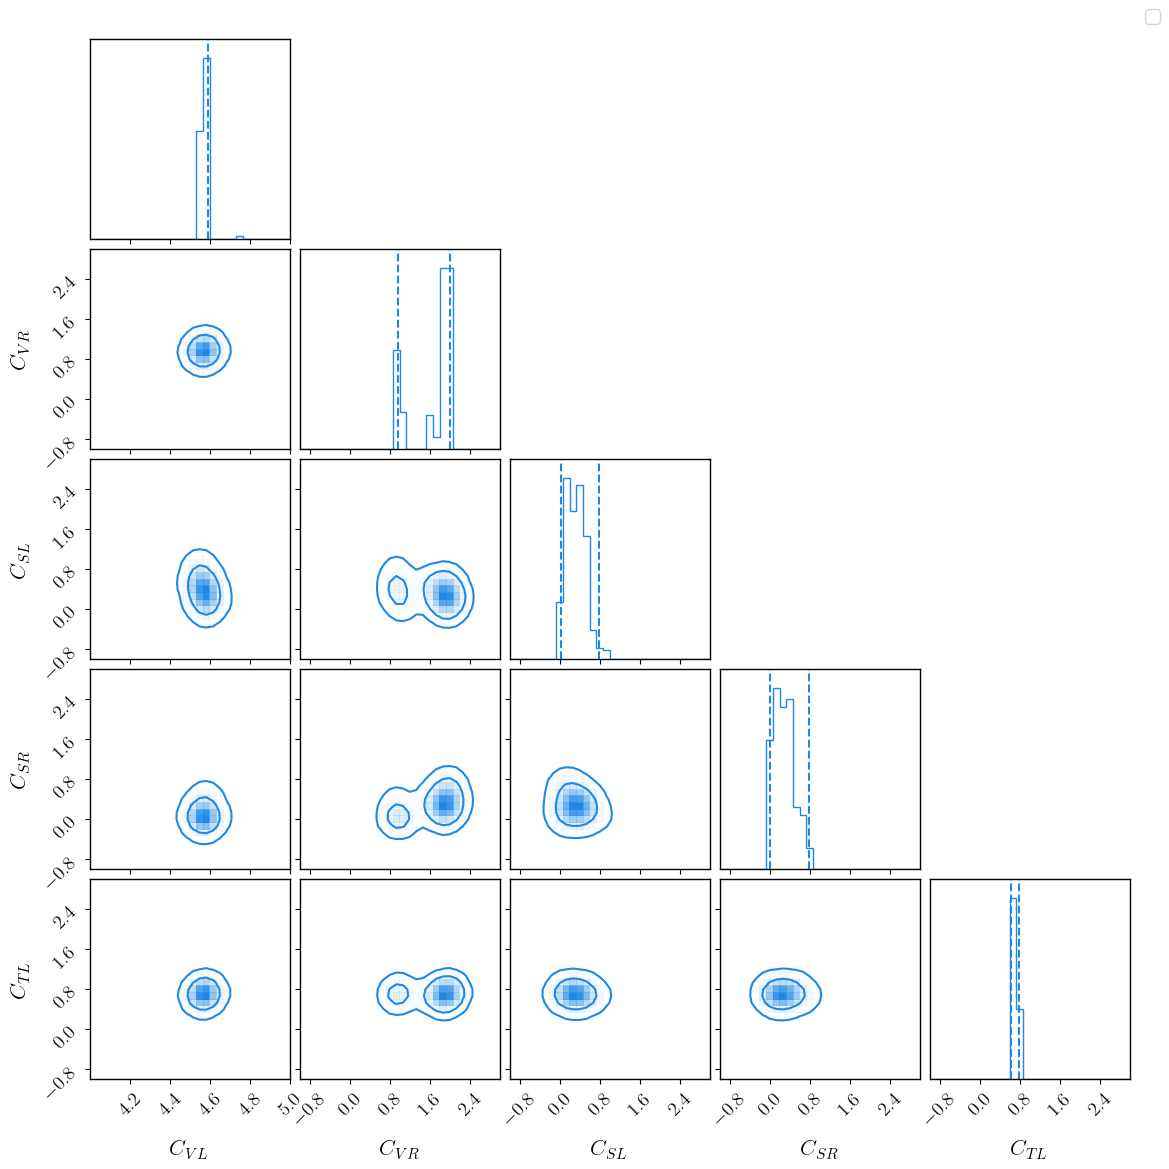

In [10]:
cvl = r'$C_{VL}$'
cvr = r'$C_{VR}$'
csl = r'$C_{SL}$'
csr = r'$C_{SR}$'
ctl = r'$C_{TL}$'
labels = [cvl, cvr, csl, csr, ctl]

# file = '../results/samples/posterior_corner.pdf'

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = [(4, 5), (-1,3),(-1,3), (-1,3), (-1,3)],
                    smooth=1.5,
                    labels=labels,
                    color='#1E88E5',
                    plot_datapoints=False
                    );

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()